In [ ]:
from sympy import (Function, Symbol, simplify, cos, coth, diff, evalf, exp, log, oo, series, 
				   sinh, solve, sqrt, tanh)

from matplotlib import pyplot as plot

from LocUtil import Grid1

In [11]:
nPlot = 100

In [83]:
x = Symbol('x')
z = Symbol('z')

## Log Ratio

In [80]:
a = Symbol('a')
b = Symbol('b')

z0 = Symbol('z0')
s = Symbol('s')

In [101]:
map = (s * log((x - a) / (b - x)) + z0)
map

s*log((-a + x)/(b - x)) + z0

In [103]:
sys = map - z
solve(sys, x)[0]

(a + b*exp((z - z0)/s))/(exp((z - z0)/s) + 1)

In [104]:
inv = (a + b*exp((z - z0)/s)) / (exp((z - z0)/s) + 1)
inv

(a + b*exp((z - z0)/s))/(exp((z - z0)/s) + 1)

In [105]:
null = (1/map.diff(x)).simplify()
null

(a - x)*(b - x)/(s*(a - b))

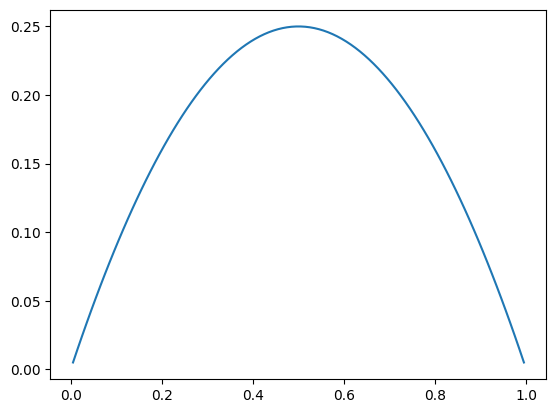

In [109]:
xL = [(k + 0.5) / nPlot for k in range(nPlot)]
nullL = [null.subs({x:xV, a:0, b:1, s:1}).evalf() for xV in xL]
plot.plot(xL,nullL)

In [95]:
nullLeft = (x - a) / sqrt(s * (b-a))
nullRight = (b - x) / sqrt(s * (b-a))

In [97]:
(nullLeft * nullRight).simplify()

(a - x)*(b - x)/(s*(a - b))

In [110]:
nullLeft.subs({x:inv}).simplify()

(-a + b)*exp(z/s)/(sqrt(s*(-a + b))*(exp(z/s) + exp(z0/s)))

In [111]:
nullRight.subs({x:inv}).simplify()

(-a + b)*exp(z0/s)/(sqrt(s*(-a + b))*(exp(z/s) + exp(z0/s)))

## Log-Shinh

In [17]:
map = log(sinh(x))
map

log(sinh(x))

In [18]:
null = (1/map.diff(x)).simplify()
null

tanh(x)

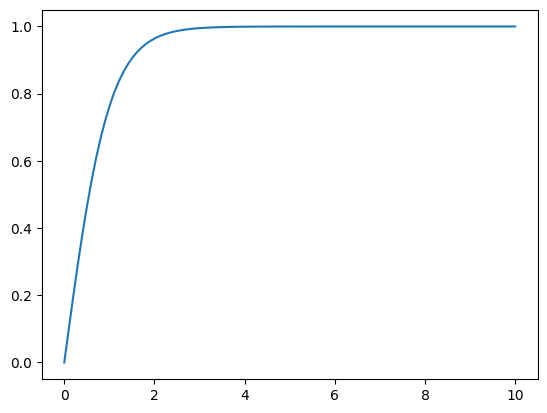

In [42]:
xL = Grid1(0,10,nPlot)
nullL = [null.subs(x,xV).evalf() for xV in xL]

plot.plot(xL,nullL)

In [27]:
null.rewrite(exp)

(exp(x) - exp(-x))/(exp(x) + exp(-x))

In [28]:
null.subs(x,0)

0

In [21]:
null.series(x,0,n=8)

x - x**3/3 + 2*x**5/15 - 17*x**7/315 + O(x**8)

In [35]:
null.series(x,oo,n=8)

PoleError: 
Asymptotic expansion of tanh around [oo] is not implemented.

In [40]:
exp(-x).series(x, oo)

O(x**(-6), (x, oo))

Turns out that sympy series only works with powers of x not powers of exp(x)

In [45]:
tanh(x).series(exp(x))

tanh(x)

In [48]:
w = Symbol('w')
((w - 1/w) / (w + 1/w)).series(w,oo,10)

2/w**8 - 2/w**6 + 2/w**4 - 2/w**2 + 1 + O(w**(-10), (w, oo))

In [50]:
(1 - 2/w**2).subs(w,exp(x))

1 - 2*exp(-2*x)

In [52]:
null ** 2

tanh(x)**2

In [55]:
nullLeft = x
nullRight = exp(-x)
nullProd = nullLeft * nullRight
nullProd

x*exp(-x)

In [57]:
diff(nullProd,x).factor()

-(x - 1)*exp(-x)

## Criteria

This is form Theorem 4.4.1 in Stanger

In [60]:
g = Function('g')
S = Function('S')
phi = Function('phi')

temp = g(x) * S(phi(x))
temp

S(phi(x))*g(x)

In [61]:
diff(temp,x)

S(phi(x))*Derivative(g(x), x) + g(x)*Derivative(S(phi(x)), phi(x))*Derivative(phi(x), x)

In [63]:
diff(S(phi(x)), x)

Derivative(S(phi(x)), phi(x))*Derivative(phi(x), x)

In [64]:
diff(log(sinh(x)), x)

cosh(x)/sinh(x)

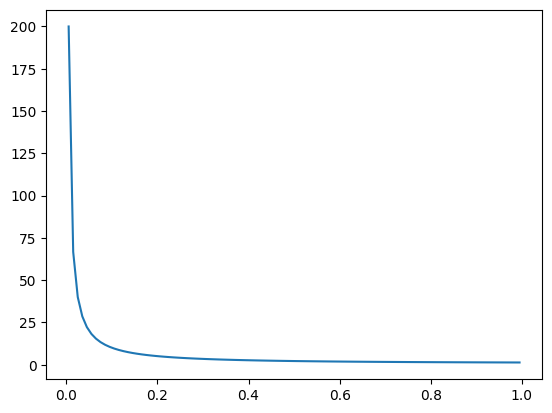

In [79]:
xL = [(k + 0.5) / nPlot for k in range(nPlot)]
phi1 = [coth(x).subs(x,xV).evalf() for xV in xL]
plot.plot(xL,phi1)

NullLeft should be x, but NullRight should be 1.

It is the reciprocal of the series of diff(phi(x),x) at the ends of the region, even when the 
region is semi-infinite.